# Introduction à la Science des Données
# TP3 - Arbres de Décision

La documentation Scikit-Learn sur les Arbres de Décision se trouve ici : http://scikit-learn.org/stable/modules/tree.html

Dans ce TP, nous allons utiliser 2 jeux de données classiques, venant des bases de l'[UCI](https://archive.ics.uci.edu/ml/index.php).

## Données voitures
Dans ce jeux de données, il est question de l'acceptabilité de voitures suivant 6 critères (donc nos données sont en dimension 6, auxquelles s'ajoute une septième correspondant à la classe).

Les 1726 données sont triées en 4 classes : non-acceptable (*unacc*), acceptable (*acc*), bonne (*good*), très bonnes (*vgood*). Pour plus de détail, la page web décrivant les données se trouve [ici](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).
### Récupération et préparation des données

Il nous faut dans un premier temps récupérer les données - disponibles sous la forme d'un .csv - (une ligne d'un notebook commançant par '!' autorise l'utilisation de n'importe quelle commande shell) :

In [1]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2020-01-28 14:59:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data’

car.data            100%[===================>]  50,65K   178KB/s    in 0,3s    

2020-01-28 14:59:39 (178 KB/s) - ‘car.data’ saved [51867/51867]



Les données sont structurées de cette façon :
- une données pas ligne
- chaque ligne est composée des valeurs respectives pour chaque attribut, séparées par des virgules
- la dernière valeur est la classe

In [2]:
! cat car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

Avant de commencer, on peut analyser les données en regardant leurs caractéristiques :

<p>Nombre d'attribus: 6</p>
<p>Valeurs d'attribut manquantes : aucune</p>
<table>
<thead>
<tr>
<th>Attribut</th>
<th>Valeurs</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
<td>2, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
<td>2, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Nombre de données : 1728 </p>
<table>
<thead>
<tr>
<th>classe</th>
<th>Nombre</th>
<th>Nombre[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
<td>1210</td>
<td>70.023 %</td>
</tr>
<tr>
<td>acc</td>
<td>384</td>
<td>22.222 %</td>
</tr>
<tr>
<td>good</td>
<td>69</td>
<td>3.993 %</td>
</tr>
<tr>
<td>v-good</td>
<td>65</td>
<td>3.762 %</td>
</tr>
</table>
<p>Nous avons donc des données très déséquilibrées au niveau des classes.</p>
<p>Pour pouvoir travailler avec, il nous faut commencer par mettre les données dans un format utile à scikit-learn :</p>

In [1]:
import numpy as np

nom_attributs = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
# Récupération des données sous forme de strings :
donnees = np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")
X_string = donnees[:, :-1]

# Transformation en floatants
from sklearn.preprocessing import OrdinalEncoder
codage = OrdinalEncoder()
codage.fit(X_string)
X = codage.transform(X_string)
X = X.astype(int) #transformation des floatants en entiers 

In [2]:
#### Ce qui précède ne fonctionne qu'en sklearn 0.20
#### En 0.19 ou moins :

import numpy as np
from sklearn.preprocessing import LabelEncoder

donnees =np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")
X_string = donnees[:, :-1]
X = LabelEncoder().fit_transform(X_string.ravel()).reshape(*X_string.shape)
X.shape

(1728, 6)

**Q.** Faire de même avec les classes pour obtenir un vecteur *y* d'entiers. 

In [3]:
Y_string =  donnees[:,-1]
codage.fit(Y_string.reshape(-1, 1))
Y = codage.transform(Y_string.reshape(-1, 1))
Y = Y.reshape(len(Y))
Y = Y.astype(int) #transformation des floatants en entiers 
print(Y)

[2 2 2 ... 2 1 3]


### Apprentissage d'arbres de décision
#### Mise en place
Maintenant qu'elles ont un format acceptable par scikit-learn, nous allons diviser les données en un ensemble de test et un ensemble d'apprentissage, comme dans le TP précédent.

In [27]:
from sklearn.model_selection import train_test_split
# production de deux sous-échantillon
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42) 

Nous allons utiliser la classe *sklearn.tree.DecisionTreeClassifier* qui contient tout ce qui est nécessaire pour la classification supervisée à l'aide d'arbres de décision. Vous trouverez sa documentation là : http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

A utiliser sans modération !

#### Apprentissage
Commençons pas créer une instance de la classe :

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

Maintenant que le classifieur a été créé, il nous faut l'entrainer sur les données, c'est-à-dire réaliser l'apprentissage :

In [29]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Evaluons les performances sur l'échantillon de test :

In [30]:
print("Taux de bonne classification : %f" %clf.score(X_test, y_test))

# Calcul du F-score
from sklearn.metrics import f1_score
y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (déséquilibré) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(4):
    print("F-score pour la classe %i : %f" %(i, F_scores[i]))

Taux de bonne classification : 0.979167
F-score global : 0.979167 
F-score global (déséquilibré) : 0.931971 
F-score pour la classe 0 : 0.955224
F-score pour la classe 1 : 0.800000
F-score pour la classe 2 : 0.998302
F-score pour la classe 3 : 0.974359


C'est pas mal, non ? 

#### Affichage
L'avantage des arbres de décision, c'est qu'ils offrent une représentation graphique. Mais pour pouvoir l'aficher, il va nous falloir installer 2 packages supplémentaires :

In [31]:
!pip3 install pydotplus --user
!pip3 install graphviz

    100% |████████████████████████████████| 286kB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/sotiris/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


Nous pouvons alors afficher l'arbre appris. Comme nous aurons besoin souvent d'afficher un arbre, nous créons une fonction :

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

def affiche_arbre(classifieur, nom_attributs):
    dot_data = export_graphviz(classifieur,
                            feature_names=nom_attributs,
                            out_file=None,
                            filled=True,
                            rounded=True)
    return pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph = affiche_arbre(clf, nom_attributs) 
Image(graph.create_png())

## Validation croisée (et retours des Digits)

Si vous avez été curieux, vous avez peut-être déjà tester ça :

In [38]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Il y a donc 13 paramètres d'initialisation pour le classifieur. On se propose d'étudier l'impact de 3 d'entre eux  sur l'apprentissage :
- *criterion* qui par défaut vaut 'gini' mais peut-valoir aussi 'entropy'
- *max_depth* qui permet d'élaguer l'arbre en arrêtant l'appel récursif de l'algorithme d'apprentissage quand le noued courant est à cette profondeur
- *max_leaf_nodes* qui élague aussi l'arbre en ne gardant au maximum que ce nombre de feuilles (celles les plus pures, c'est à dire avec le moins de données de différentes classes)

Les données sur les voitures étant trop simples pour apprécier la puissance des arbres de décision, nous allons en utiliser un autre : les *digits* du second TP.

In [39]:
from sklearn.datasets import load_digits  #importation de la commande
digits = load_digits()
X = digits.data
y = digits.target

Il est temps de voir si vous avez suivi jusque là. Il vous faut : mettre de coté 30% pour le test, créer un classifieurs à base d'arbres de décision, apprendre sur les données d'entrainement, calculer le taux de bonne classification, et les différentes variantes du F-score sur les 10 classes de digits en utilisant les données de test.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) 

clf.fit(X_train,y_train)

y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (déséquilibré) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(10):
    print("F-score pour la classe %i : %f" %(i, F_scores[i]))


F-score global : 0.842593 
F-score global (déséquilibré) : 0.840876 
F-score pour la classe 0 : 0.914286
F-score pour la classe 1 : 0.757282
F-score pour la classe 2 : 0.786517
F-score pour la classe 3 : 0.814159
F-score pour la classe 4 : 0.829268
F-score pour la classe 5 : 0.890625
F-score pour la classe 6 : 0.934579
F-score pour la classe 7 : 0.844037
F-score pour la classe 8 : 0.825000
F-score pour la classe 9 : 0.813008


Maintenant que nous avons mesuré la qualité pour les valeurs par défaut des paramètres, nous allons réaliser de la **validation-croisée** sur l'ensemble d'apprentissage (*train*). Une fois qu'on aura trouvé les meilleurs paramètres, on apprendra un arbre sur l'ensemble complet d'apprentissage avec ces paramètres et on évaluera la qualité de cet apprentissage final sur l'ensemble de test.

On commence par évaluer l'impact du critère de choix du test (*criteriom*) :

In [41]:
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(random_state=42)
reussite_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10)
f1_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10, scoring='f1_macro')
print("Pour le gini :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_gini.mean(), reussite_gini.std(), f1_gini.mean(), f1_gini.std()) )

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
reussite_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10)
f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10, scoring='f1_macro')
print("Pour l'entropie :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_entropy.mean(), reussite_entropy.std(), f1_entropy.mean(), f1_entropy.std()) )

Pour le gini :
 	 taux de réussite : 0.848257 (+/-) 0.030825
       	 F-score (global) : 0.847307 (+/-) 0.030166
 
Pour l'entropie :
 	 taux de réussite : 0.851136 (+/-) 0.027932
       	 F-score (global) : 0.850271 (+/-) 0.028092
 


Qu'en déduire ? Est-ce que l'entropie est statistiquement meilleure sur ce jeu de données ? Choisir un critère : ce sera le seul qui sera utilisé par la suite.

Il faut maintenant regarder l'impact des 2 autres paramètres : 
- *max_depth* que l'on fera varier entre entre 5 et 20
- *max_leaf_nodes* qu'on veut faire varier entre 20 et 200 par paliers de 20 (c'est-à-dire 20, 40, 60, ..., 200).
On se propose d'étudier l'impact de ces paramètres de manière indépendante, avec l'entropie comme critère de sélection.

Il faudra produire 4 courbes montrant les évolutions du taux de réussite et du F-score global avec chacun des paramètres. Il faudra aussi faire apparaitre l'écart type sur sur les courbes : l'utilisation de la fonction pyplot *errorbar* (https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) est vivement conseillée.

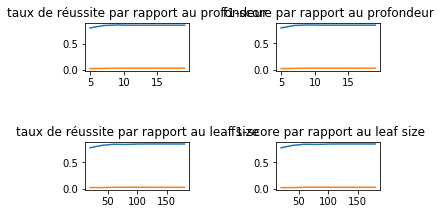

In [58]:
import matplotlib.pyplot as plt

depth_list = np.arange(5,21,2)
leaf_list = np.arange(20,200,20)
reuss_ent_mean = []
reuss_ent_std = []
f1_ent_mean = []
f1_ent_std = []


for i in range(len(depth_list)):
    clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=depth_list[i], random_state=42)
    reussite_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10)
    f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10, scoring='f1_macro')
    reuss_ent_mean.append(reussite_entropy.mean())
    reuss_ent_std.append(reussite_entropy.std())
    f1_ent_mean.append(f1_entropy.mean())
    f1_ent_std.append(f1_entropy.std())
    
reuss_ent_mean_l = []
reuss_ent_std_l = []
f1_ent_mean_l = []
f1_ent_std_l = []

    
for i in range(len(leaf_list)):
    clf_entropy = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=leaf_list[i], random_state=42)
    reussite_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10)
    f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10, scoring='f1_macro')
    reuss_ent_mean_l.append(reussite_entropy.mean())
    reuss_ent_std_l.append(reussite_entropy.std())
    f1_ent_mean_l.append(f1_entropy.mean())
    f1_ent_std_l.append(f1_entropy.std())
    
fig , ax = plt.subplots(2,2)
fig.tight_layout(pad=5.0)
ax[0][0].plot(depth_list,reuss_ent_mean)
ax[0][0].errorbar(depth_list,reuss_ent_std,label='Ecart type')
ax[0][0].set_title("taux de réussite par rapport au profondeur")
ax[0][1].set_title("f1-score par rapport au profondeur")
ax[0][1].plot(depth_list,f1_ent_mean)
ax[0][1].errorbar(depth_list,f1_ent_std,label='Ecart type')

ax[1][0].plot(leaf_list,reuss_ent_mean_l)
ax[1][0].errorbar(leaf_list,reuss_ent_std_l,label='Ecart type')
ax[1][0].set_title("taux de réussite par rapport au leaf size")
ax[1][1].set_title("f1-score par rapport au leaf size")
ax[1][1].plot(leaf_list,f1_ent_mean_l)
ax[1][1].errorbar(leaf_list,f1_ent_std_l,label='Ecart type')
plt.show()

En déduire les valeurs optimales des 3 paramètres et les utiliser pour apprendre un arbre de décition sur l'intégralité de l'ensemble d'entrainement, puis évaluer la qualité de l'apprentissage sur l'ensemble de test.

In [60]:
clf = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=80 ,max_depth=7,random_state=42)

clf.fit(X_train,y_train)

y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (déséquilibré) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(10):
    print("F-score pour la classe %i : %f" %(i, F_scores[i]))

F-score global : 0.866667 
F-score global (déséquilibré) : 0.865711 
F-score pour la classe 0 : 0.934579
F-score pour la classe 1 : 0.851485
F-score pour la classe 2 : 0.813187
F-score pour la classe 3 : 0.857143
F-score pour la classe 4 : 0.824561
F-score pour la classe 5 : 0.861538
F-score pour la classe 6 : 0.934579
F-score pour la classe 7 : 0.869565
F-score pour la classe 8 : 0.840909
F-score pour la classe 9 : 0.869565


## Préparation des données & forêts aléatoires
Nous continuons à augmenter la difficulté, en téléchargeant cette fois un jeux de données venant de banques portugaises, décrit [ici](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) :

In [61]:
! wget pageperso.lif.univ-mrs.fr/~remi.eyraud/ISD/bank-additional.csv

--2020-01-28 16:08:51--  http://pageperso.lif.univ-mrs.fr/~remi.eyraud/ISD/bank-additional.csv
Resolving pageperso.lif.univ-mrs.fr (pageperso.lif.univ-mrs.fr)... 139.124.22.27
Connecting to pageperso.lif.univ-mrs.fr (pageperso.lif.univ-mrs.fr)|139.124.22.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583898 (570K) [text/csv]
Saving to: ‘bank-additional.csv’

bank-additional.csv 100%[===================>] 570,21K   993KB/s    in 0,6s    

2020-01-28 16:08:52 (993 KB/s) - ‘bank-additional.csv’ saved [583898/583898]



### Pandas
Contrairement aux données voitures, nous allons utiliser un package python très utile pour préparer et réaliser une première analyse des données : *pandas*. Il est possible que ce package ne soit pas installer sur les machines :

In [ ]:
! pip3 install pandas --user

On peut alors importer le package, puis utiliser la fonction qui permet de transformer un fichier csv comme celui qu'on vient de télécharger en une *dataframe*. Ce type, propre à *pandas*, permet de présenter les données sous une forme très utile.

In [97]:
import pandas as pd
df = pd.read_csv('./bank-additional.csv', sep=';')

Maintenant qu'on a une dataframe, on peut facilement regarder à quoi ressemble les données, en regardant les 4 premières :

In [92]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


On peut le transposer pour le lire plus simplement :

In [86]:
np.transpose(df.head())

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [87]:
df.shape

(4119, 21)

Il y a donc 4119 données, chacune étant décrite par 20 attributs, la colonne finale *y* contenant la cible à apprendre. Cette classe peut prendre 2 valeurs : *no* ou *yes*. Il s'agissait pour la banque de savoir à qui proposer une assurance vie.

Que pouvons nous dire des attributs numériques ?Les dataframes nous donnent accès facilement aux statistiques descriptives :

### Reponse



In [ ]:
df.describe()

Est-ce que ces classes sont équitablements représentées dans les données ? 

In [66]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

Il y a donc une classe beaucoup plus présente que l'autre dans les données. Il faudra donc faire attention à comment nous allons évaluer l'apprentissage pour en tenir compte.


Il faut mettre les données sous forme scikit-learn, mais cette fois ce sera plus facile grace à *pandas* :

In [123]:
X = df.drop(['y'], axis=1)
y = df['y']
np.transpose(X.head())

,0,1,2,3,4
age,30,39,25,38,47
job,1,7,7,7,0
marital,1,2,1,1,1
education,2,3,3,2,6
default,0,0,0,0,0
housing,1,0,1,1,1
loan,0,0,0,0,0
contact,0,1,1,1,0
month,6,6,4,4,7
day_of_week,0,0,4,0,1


### Random forest
Maintenant que les données sont préparées pour scikit-learn, c'est à vous de jouer ! Mais nous allons utiliser des forêts aléatoires à la place des arbres de décision.

Scikit-learn incorpore aussi les [forêts aléatoire](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Recommencez l'exercice précédent avec ce classifieur, en regardant l'hyper-paramètre *n_estimators*

Il faut donc :

1. Transformer les données pour gérer les attributs qui ne sont pas numériques, 
2. Les découper (prendre 30% pour l'ensemble de test), 
3. Chercher les meilleures valeurs possibles pour le paramètre *n_estimator*  (en tester une dizaine, équitablement réparties entre 50 et 600, à l'aide de la validation croisée), 
4. Apprenez sur l'ensemble d'apprentissage avec cette valeur optimale, 
5. Calculer les mesures de qualité (taux d'erreur et F-score) sur l'ensemble de test  

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)

df = df.replace('unknown', None)
df = df.replace('nonexistent', None)
df['default'] = df['default'].apply(lambda x: 1 if(x=='yes') else x)
df['default'] = df['default'].apply(lambda x: 0 if(x=='no') else x)
df['housing'] = df['housing'].apply(lambda x: 1 if(x=='yes') else x)
df['housing'] = df['housing'].apply(lambda x: 0 if(x=='no') else x)
df['loan'] = df['loan'].apply(lambda x: 1 if(x=='yes') else x)
df['loan'] = df['loan'].apply(lambda x: 0 if(x=='no') else x)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['marital']  = le.fit_transform(np.ravel(df['marital']))    # warning thrown without np.ravel
df['job']  = le.fit_transform(np.ravel(df['job'])) 
df['education']  = le.fit_transform(np.ravel(df['education'])) 
df['contact']  = le.fit_transform(np.ravel(df['contact'])) 
df['month']  = le.fit_transform(np.ravel(df['month']))
df['day_of_week'] = le.fit_transform(np.ravel(df['day_of_week']))
df['poutcome'] = le.fit_transform(np.ravel(df['poutcome']))
df['y'] = le.fit_transform(np.ravel(df['y']))

In [132]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,3,0,1,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,2,0,1,0,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,6,0,1,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) 

rf_clf.fit(X_train,y_train)

y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (déséquilibré) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(10):
    print("F-score pour la classe %i : %f" %(i, F_scores[i]))

ValueError: could not convert string to float: 'failure'

In [129]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [139]:
df['y']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
4089    1
4090    0
4091    0
4092    0
4093    0
4094    0
4095    0
4096    0
4097    0
4098    0
4099    0
4100    0
4101    0
4102    0
4103    0
4104    0
4105    0
4106    0
4107    0
4108    0
4109    0
4110    0
4111    0
4112    0
4113    0
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64